In [1]:
# 20171615 최하록

## HW5

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

In [3]:
img = cv2.imread("coins2.jpg")

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (19, 19), 0)
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 3, 1)

In [5]:
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations = 19)

In [6]:
cont_img = closing.copy()
contours, hierarchy = cv2.findContours(cont_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [7]:
count = 0
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 2000 or area > 10000:
        continue
    count = count + 1
    print(area)
    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(img, ellipse, (0,255,0), 10)

6965.5
5986.5
8227.5
7486.5
5187.5
4564.5
7355.5
7876.5


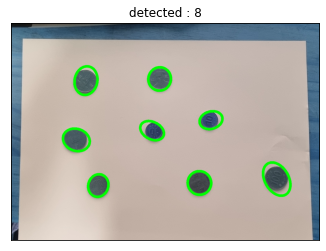

In [8]:
plt.title('detected : ' + str(count))
plt.imshow(img)
plt.xticks([]),plt.yticks([])
plt.show()